In [26]:
import glob
import numpy as np
import pandas as pd

import clima_anom as ca

import matplotlib.cbook
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import cartopy
import cartopy.crs as ccrs

In [27]:
product = 'rgpf'

In [28]:
list_files = glob.glob('/mnt/Data/Data/PF/'+product+'_raw/*.HDF')
list_files = sorted(list_files)
len_files = len(list_files)
print(f'{len_files} files found')
list_files[0:2]

85 files found


['/mnt/Data/Data/PF/rgpf_raw/pf_201403_level2.HDF',
 '/mnt/Data/Data/PF/rgpf_raw/pf_201404_level2.HDF']

In [29]:
list_files[10]

'/mnt/Data/Data/PF/rgpf_raw/pf_201501_level2.HDF'

In [30]:
data = ca.read_netcdf(list_files[10],2)

NFILES : (1,)
ORBIT : (480248,)
GRPNUM : (480248,)
KUPFGRPNUM : (480248,)
LAT : (480248,)
LON : (480248,)
ALTRK : (480248,)
ACTRK : (480248,)
CENTERTRK : (480248,)
ELEV : (480248,)
YEAR : (480248,)
MONTH : (480248,)
DAY : (480248,)
HOUR : (480248,)
NPIXELS : (480248,)
NPIXELS_20DBZ : (480248,)
NPIXELS_30DBZ : (480248,)
NPIXELS_40DBZ : (480248,)
NPIXELS_50DBZ : (480248,)
NPIXELS_20MM : (480248,)
NPIXELS_30MM : (480248,)
NPIXELS_40MM : (480248,)
NPIXELS_50MM : (480248,)
NPIXELS_100MM : (480248,)
NPIXELS_GMI : (480248,)
NRAINPIXELS_KU : (480248,)
NSNOWPIXELS_KU : (480248,)
NMIXPIXELS_KU : (480248,)
NRAINPIXELS_GMI : (480248,)
NSNOWPIXELS_GMI : (480248,)
VOLRAIN_KU : (480248,)
VOLSNOW_KU : (480248,)
VOLMIX_KU : (480248,)
VOLRAINES_KU : (480248,)
VOLRAIN_20DBZ : (480248,)
VOLRAIN_30DBZ : (480248,)
VOLRAIN_40DBZ : (480248,)
VOLRAIN_50DBZ : (480248,)
VOLRAIN_20MM : (480248,)
VOLRAIN_30MM : (480248,)
VOLRAIN_40MM : (480248,)
VOLRAIN_50MM : (480248,)
VOLRAIN_100MM : (480248,)
MAXPIA : (480248,)

In [34]:
list_var = ['YEAR','ORBIT',
            'NPIXELS_20DBZ', 'NPIXELS_30DBZ', 'NPIXELS_40DBZ', 'NPIXELS_50DBZ', 
            'NPIXELS_20MM', 'NPIXELS_30MM', 'NPIXELS_40MM', 'NPIXELS_50MM', 
            'NSNOWPIXELS_KU', 'NSNOWPIXELS_GMI',  
            'MIN85PCT','NLT250','NLT225','N37LT250','N37LT225',
            'MAXHT20','MAXHT30','MAXHT40',
            'NSTRAT_KU', 'NCONV_KU']

list_description = ['Number of radar pixels with 20 dBZ',
                    'Number of radar pixels with 30 dBZ',
                    'Number of radar pixels with 40 dBZ',
                    'Number of radar pixels with 50 dBZ',,s=orbit_ref['grpnum']/np.max(orbit_ref['grpnum'])
                    'Number of radar pixels with 37 GHz PCT < 225 (K)',

                    'Maximum height with 20 dBZ echo (km)',
                    'Maximum height with 30 dBZ echo (km)',
                    'Maximum height with 40 dBZ echo (km)',

                    'Number of stratiform pixels with Ku-band',
                    'Number of convective pixels with Ku-band',
                    ]

In [35]:
for nn in range(len_files):

    file_input = list_files[nn]
    print(file_input)

    data = ca.read_netcdf(file_input,1)
    lat = data['LAT'].data
    lon = data['LON'].data

    data_in = np.zeros([len(lat),len(list_var)])

    for t in range(len(list_var)):
        data_in[:,t] = np.round(data[list_var[t]].data,2)

    pd_in = pd.DataFrame(data_in, columns=list_var)
    pd_in.insert(0, "lat", lat, True)
    pd_in.insert(1, "lon", lon, True)

    # South America Region
    out1 = pd_in[(pd_in['lon'] > -85) & (pd_in['lon'] < -30 )]
    out2 = out1[(out1['lat'] > -45) & (out1['lat'] < 15 )]

    # export dataframe to csv
    salida = '/mnt/Data/Data/PF/rgpf_SA/' + file_input.split('/')[-1].replace('.HDF','.csv').replace('pf',product)
    print(f'Exporting data to {salida}')
    out2.to_csv(salida,header=True,index=False)

    print()

/mnt/Data/Data/PF/rgpf_raw/pf_201403_level2.HDF
Number of variables:  125
Exporting data to /mnt/Data/Data/PF/rgpf_SA/rgpf_201403_level2.csv

/mnt/Data/Data/PF/rgpf_raw/pf_201404_level2.HDF
Number of variables:  125
Exporting data to /mnt/Data/Data/PF/rgpf_SA/rgpf_201404_level2.csv

/mnt/Data/Data/PF/rgpf_raw/pf_201405_level2.HDF
Number of variables:  125
Exporting data to /mnt/Data/Data/PF/rgpf_SA/rgpf_201405_level2.csv

/mnt/Data/Data/PF/rgpf_raw/pf_201406_level2.HDF
Number of variables:  125
Exporting data to /mnt/Data/Data/PF/rgpf_SA/rgpf_201406_level2.csv

/mnt/Data/Data/PF/rgpf_raw/pf_201407_level2.HDF
Number of variables:  125
Exporting data to /mnt/Data/Data/PF/rgpf_SA/rgpf_201407_level2.csv

/mnt/Data/Data/PF/rgpf_raw/pf_201408_level2.HDF
Number of variables:  125
Exporting data to /mnt/Data/Data/PF/rgpf_SA/rgpf_201408_level2.csv

/mnt/Data/Data/PF/rgpf_raw/pf_201409_level2.HDF
Number of variables:  125
Exporting data to /mnt/Data/Data/PF/rgpf_SA/rgpf_201409_level2.csv

/mnt/D

In [36]:
out2

,lat,lon,YEAR,ORBIT,NPIXELS_20DBZ,NPIXELS_30DBZ,NPIXELS_40DBZ,NPIXELS_50DBZ,NPIXELS_20MM,NPIXELS_30MM,...,MIN85PCT,NLT250,NLT225,N37LT250,N37LT225,MAXHT20,MAXHT30,MAXHT40,NSTRAT_KU,NCONV_KU
830,12.291802,-31.702375,2021.0,39800.0,0.0,0.0,0.0,0.0,0.0,0.0,...,284.079987,0.0,0.0,0.0,0.0,2.50,0.00,0.0,0.0,1.0
831,11.816883,-30.557055,2021.0,39800.0,0.0,0.0,0.0,0.0,0.0,0.0,...,281.260010,0.0,0.0,0.0,0.0,2.62,0.00,0.0,0.0,1.0
2086,14.713903,-56.258194,2021.0,39801.0,1.0,0.0,0.0,0.0,0.0,0.0,...,284.619995,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,1.0
2088,14.569908,-56.299728,2021.0,39801.0,0.0,0.0,0.0,0.0,0.0,0.0,...,283.200012,0.0,0.0,0.0,0.0,2.38,0.00,0.0,0.0,2.0
2089,14.413473,-56.456211,2021.0,39801.0,7.0,1.0,0.0,0.0,0.0,0.0,...,282.179993,0.0,0.0,0.0,0.0,3.12,2.62,0.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711275,-43.596939,-37.633965,2021.0,40278.0,0.0,0.0,0.0,0.0,0.0,0.0,...,278.790009,0.0,0.0,0.0,0.0,2.50,0.00,0.0,0.0,0.0
711276,-43.858097,-37.352268,2021.0,40278.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277.299988,0.0,0.0,0.0,0.0,3.00,0.00,0.0,0.0,1.0
711277,-44.974823,-37.432049,2021.0,40278.0,42.0,1.0,0.0,0.0,0.0,0.0,...,265.040009,0.0,0.0,0.0,0.0,5.00,2.75,0.0,73.0,1.0
711278,-44.104050,-37.199436,2021.0,40278.0,0.0,0.0,0.0,0.0,0.0,0.0,...,278.529999,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0


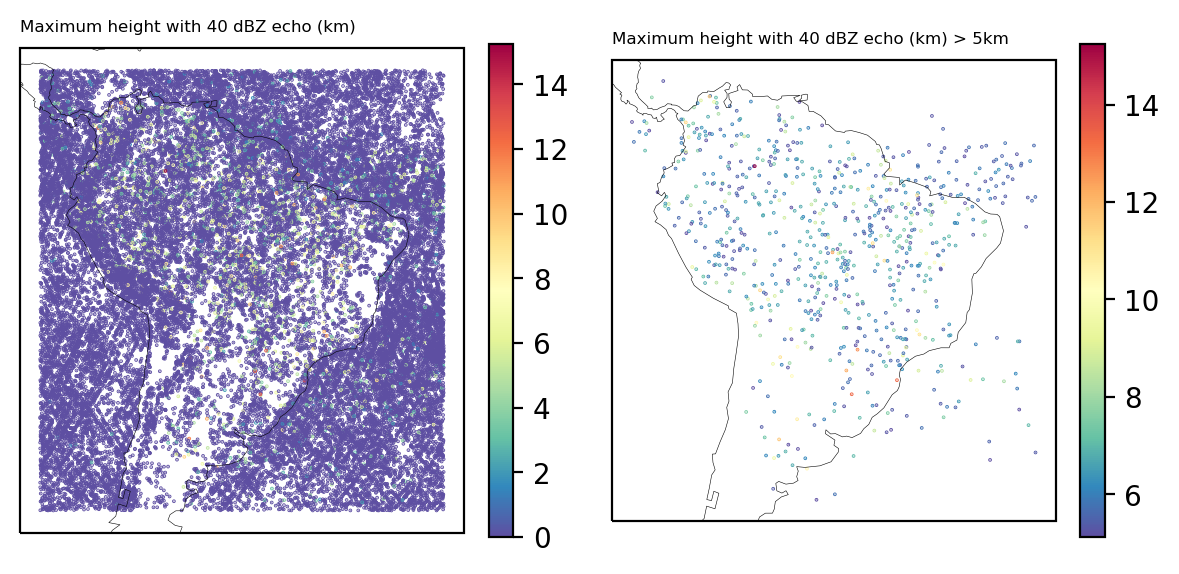

In [37]:
alt_ref = 5

proj = ccrs.PlateCarree()
cmap = plt.cm.Spectral_r

levels = np.arange(0,15,3)

fig = plt.figure(figsize=(7,4),dpi=200)
gs = gridspec.GridSpec(1,2)

ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.2,color='black',zorder=4)
a1 = ax1.scatter(out2['lon'],out2['lat'],c=out2['MAXHT40'],cmap=cmap,s=0.1,zorder=3)
ax1.set_title('Maximum height with 40 dBZ echo (km)',fontsize=6,loc='left')
plt.colorbar(a1,fraction=0.05)

ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.2,color='black',zorder=4)
a1 = ax1.scatter(out2['lon'][out2['MAXHT40']>alt_ref],out2['lat'][out2['MAXHT40']>alt_ref],c=out2['MAXHT40'][out2['MAXHT40']>alt_ref],cmap=cmap,s=0.1,zorder=3)
ax1.set_title('Maximum height with 40 dBZ echo (km) > '+str(alt_ref)+'km',fontsize=6,loc='left')
plt.colorbar(a1,fraction=0.05)